In [1]:
def read_words(filename):
    """Read words from a file and return a list."""
    with open(filename, 'r') as f:
        return [line.strip() for line in f if line.strip()]

def compute_distance(word1, word2):
    """Compute the distance between two words as per the given formula."""
    len_diff = abs(len(word1) - len(word2))
    differences = len_diff
    min_len = min(len(word1), len(word2))
    for c1, c2 in zip(word1[:min_len], word2[:min_len]):
        if c1 != c2:
            differences += 1
    return 2 * differences - 1

def find_pairs(words, max_examples=50):
    """Find and print word pairs with a distance of 1."""
    count = 0
    total_words = len(words)
    for i in range(total_words):
        for j in range(i + 1, total_words):
            word1 = words[i]
            word2 = words[j]
            distance = compute_distance(word1, word2)
            if distance == 1:
                print(f"{word1} {word2} {distance}")
                count += 1
                if count >= max_examples:
                    return

def main():
    words = read_words('words.5common.txt')
    words = read_words('words5.txt')

    find_pairs(words, max_examples=50 )

if __name__ == '__main__':
    main()


there these 1
there where 1
there theme 1
would world 1
would could 1
would wound 1
these those 1
these theme 1
click clock 1
click chick 1
price prime 1
price prize 1
price pride 1
state stage 1
state stake 1
after alter 1
where whore 1
order older 1
great treat 1
hotel motel 1
store story 1
store score 1
store stone 1
store storm 1
store shore 1
right night 1
right light 1
right might 1
right eight 1
right fight 1
right tight 1
right sight 1
local vocal 1
local focal 1
those whose 1
those chose 1
black block 1
black blank 1
check chuck 1
check chick 1
being bring 1
women woman 1
south youth 1
south mouth 1
found sound 1
found round 1
found bound 1
found pound 1
found wound 1
house horse 1


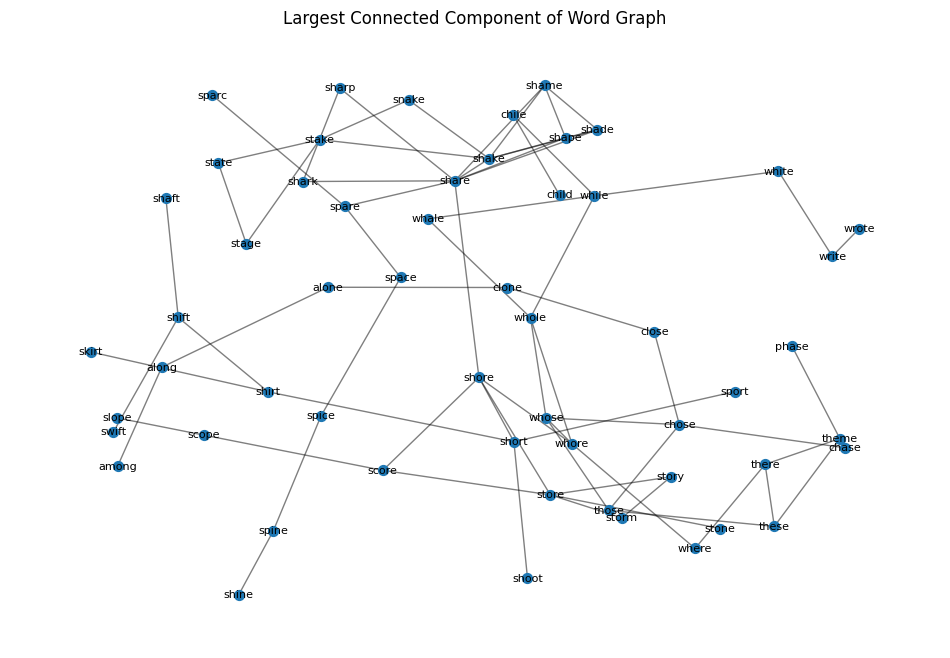

Shortest path from 'share' to 'among' using NetworkX:
share -> shore -> whore -> whose -> chose -> close -> clone -> alone -> along -> among
Node with highest degree: share (Degree: 8)


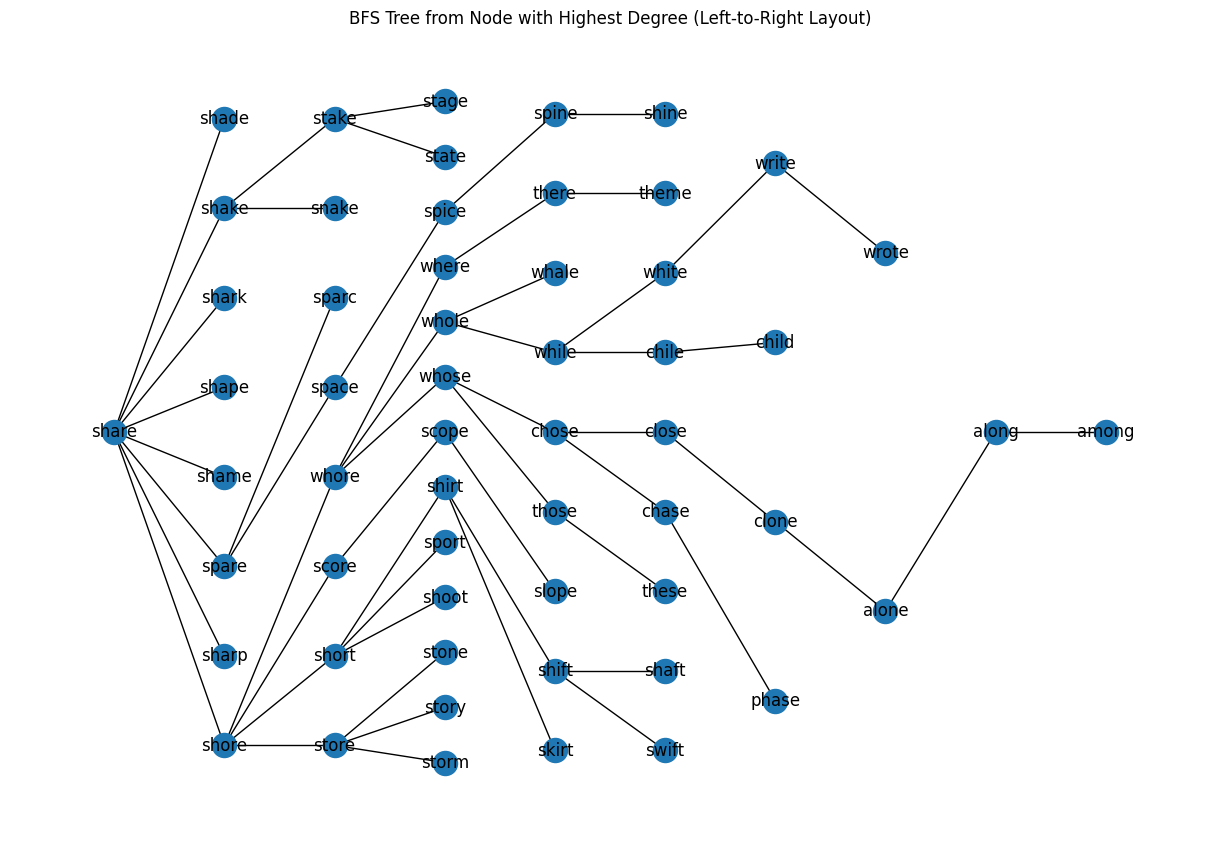


Performing explicit BFS starting from 'share'...
Path from 'share' to 'among' using manual BFS:
share -> shore -> whore -> whose -> chose -> close -> clone -> alone -> along -> among


In [2]:
# File: build_word_graph.py

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def read_words(filename):
    """Read words from a file and return a list."""
    with open(filename, 'r') as f:
        return [line.strip() for line in f if line.strip()]

def compute_distance(word1, word2):
    """Compute the distance between two words as per the given formula."""
    len_diff = abs(len(word1) - len(word2))
    differences = len_diff
    min_len = min(len(word1), len(word2))
    for c1, c2 in zip(word1[:min_len], word2[:min_len]):
        if c1 != c2:
            differences += 1
    return 2 * differences - 1

def build_graph(words):
    """Build a graph where nodes are words and edges connect words with distance 1."""
    G = nx.Graph()
    G.add_nodes_from(words)
    total_words = len(words)
    for i in range(total_words):
        for j in range(i + 1, total_words):
            word1 = words[i]
            word2 = words[j]
            distance = compute_distance(word1, word2)
            if distance == 1:
                G.add_edge(word1, word2)
    return G

def bfs():
    words = read_words('words.5common.txt')
    words = read_words('words5.txt')

    G = build_graph(words)

    # Get all connected components and sort them by size
    components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
    components.sort(key=lambda c: c.number_of_nodes(), reverse=True)

    # Get the largest component
    largest_component = components[0]

    # Visualize the largest component
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(largest_component, k=0.5)
    nx.draw_networkx_nodes(largest_component, pos, node_size=50)
    nx.draw_networkx_edges(largest_component, pos, alpha=0.5)
    nx.draw_networkx_labels(largest_component, pos, font_size=8)
    plt.title('Largest Connected Component of Word Graph')
    plt.axis('off')
    plt.show()

    # --- Find the Shortest Path from 'tales' to 'weeks' using NetworkX ---
    source_word = 'share'
    target_word = 'among'

    if source_word not in G:
        print(f"'{source_word}' is not in the graph.")
        return
    if source_word not in largest_component:
        print(f"'{source_word}' is not in the largest connected component.")
        return

    # Check if both words are in the graph
    if source_word in G and target_word in G:
        try:
            # Find the shortest path using NetworkX
            path_nx = nx.shortest_path(G, source=source_word, target=target_word)
            print(f"Shortest path from '{source_word}' to '{target_word}' using NetworkX:")
            print(" -> ".join(path_nx))
        except nx.NetworkXNoPath:
            print(f"No path exists between '{source_word}' and '{target_word}'.")
    else:
        missing_words = [word for word in [source_word, target_word] if word not in G]
        print(f"The following word(s) are not in the graph: {', '.join(missing_words)}")

    # --- BFS Tree from Node with Highest Degree ---

    # Find the node with the highest degree in the largest component
    degrees = dict(largest_component.degree())
    max_degree_node = max(degrees, key=lambda x: degrees[x])
    print(f"Node with highest degree: {max_degree_node} (Degree: {degrees[max_degree_node]})")

    # Perform BFS to construct the BFS tree
    bfs_tree = nx.bfs_tree(largest_component, source=max_degree_node)

    # Adjust the BFS tree layout to left-to-right
    # Compute the levels of the BFS tree
    levels = dict(nx.single_source_shortest_path_length(bfs_tree, max_degree_node))

    # Assign positions to nodes based on their levels
    pos = {}
    nodes_at_level = {}
    for node, level in levels.items():
        nodes_at_level.setdefault(level, []).append(node)
    max_nodes_in_level = max(len(nodes) for nodes in nodes_at_level.values())
    for level in sorted(nodes_at_level.keys()):
        nodes = nodes_at_level[level]
        y_spacing = max_nodes_in_level / len(nodes)
        y_positions = [i * y_spacing for i in range(len(nodes))]
        y_offset = -sum(y_positions) / len(y_positions)
        for i, node in enumerate(nodes):
            pos[node] = (level, y_positions[i] + y_offset)

    # Visualize the BFS tree with left-to-right layout
    plt.figure(figsize=(12, 8))
    nx.draw(bfs_tree, pos, with_labels=True, node_size=300, arrows=False)
    plt.title('BFS Tree from Node with Highest Degree (Left-to-Right Layout)')
    plt.axis('off')
    plt.show()

    # --- Explicit BFS Implementation Starting from 'tales' ---

    print(f"\nPerforming explicit BFS starting from '{source_word}'...")

    # Perform BFS manually starting from 'tales'
    visited = set()            # Set to keep track of visited nodes
    queue = deque()            # Queue for BFS
    parent = {}                # Dictionary to keep track of parent nodes

    # Initialize BFS
    visited.add(source_word)
    queue.append(source_word)
    parent[source_word] = None  # Root node has no parent

    # Flag to indicate when target is found
    found = False

    while queue:
        current_node = queue.popleft()
        # If we've reached the target, we can stop
        if current_node == target_word:
            found = True
            break
        # Get neighbors of current_node
        neighbors = list(largest_component.neighbors(current_node))
        for neighbor in neighbors:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                parent[neighbor] = current_node  # Set parent of neighbor

    # --- Reconstruct Path from 'tales' to 'weeks' using the BFS tree ---
    if found:
        # Reconstruct path from target to source using parent pointers
        path_manual = []
        current_node = target_word
        while current_node is not None:
            path_manual.append(current_node)
            current_node = parent.get(current_node)
        path_manual = path_manual[::-1]  # Reverse the path
        print(f"Path from '{source_word}' to '{target_word}' using manual BFS:")
        print(" -> ".join(path_manual))
    else:
        print(f"No path exists between '{source_word}' and '{target_word}' in the BFS tree starting from '{source_word}'.")

if __name__ == '__main__':
    bfs()


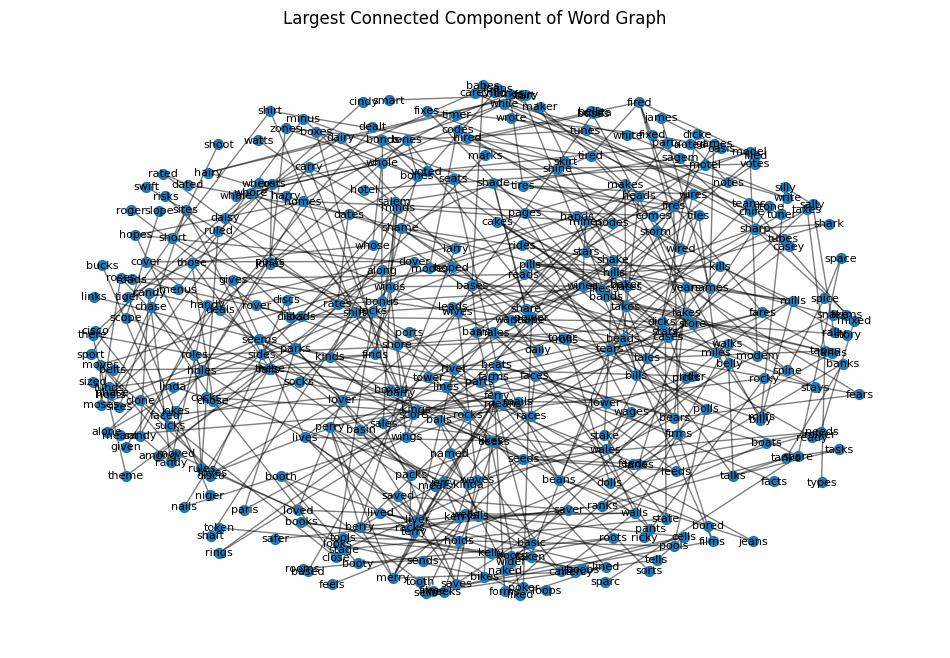

Node with highest degree: tales (Degree: 8)
DFS traversal starting from 'tales':
tales
tapes
types
takes
makes
maker
baker
males
sales
wales
walls
calls
balls
falls
fails
mails
nails
bills
pills
polls
dolls
rolls
roles
rules
ruled
roses
moses
moves
moved
loved
lover
liver
river
rider
wider
rides
sides
sites
sizes
sized
rover
roger
cover
dover
lives
lines
likes
bikes
liked
lived
lined
lakes
lanes
lands
hands
handy
candy
sandy
randy
cindy
bands
banks
tanks
ranks
racks
rocks
cocks
socks
locks
looks
books
boots
boats
beats
bears
years
tears
teams
terms
fears
beans
jeans
means
meant
meals
deals
dealt
beads
reads
roads
loads
leads
leeds
needs
feeds
feels
seeds
seems
seeks
weeks
sends
heads
loans
ready
seats
stats
state
stage
stake
snake
shake
share
shark
sharp
shore
store
stone
story
storm
score
scope
slope
short
shirt
shift
swift
shaft
skirt
shoot
sport
whore
where
there
these
those
whose
whole
whale
while
chile
child
white
write
wrote
chose
close
clone
alone
along
among
chase
phase
theme
s

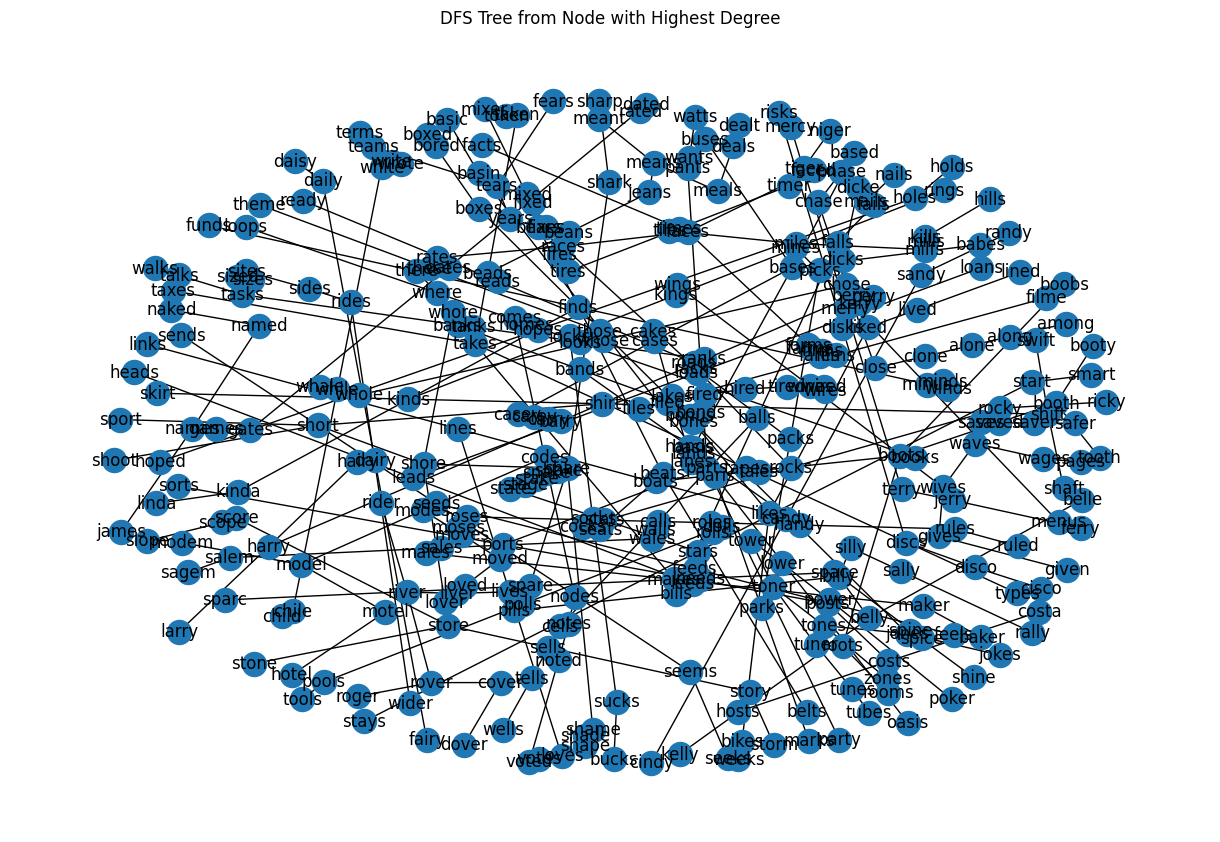


Performing manual DFS starting from 'tales'...
DFS Order (Manual DFS):
tales -> males -> makes -> cakes -> cases -> bases -> babes -> based -> basis -> basic -> basin -> oasis -> buses -> casey -> carey -> carry -> barry -> berry -> ferry -> jerry -> kerry -> merry -> mercy -> perry -> terry -> harry -> hairy -> dairy -> daily -> daisy -> fairy -> larry -> lakes -> lanes -> lands -> bands -> banks -> ranks -> racks -> packs -> parks -> marks -> paris -> parts -> pants -> wants -> watts -> party -> ports -> posts -> costs -> costa -> hosts -> sorts -> picks -> dicks -> dicke -> disks -> discs -> disco -> cisco -> risks -> races -> faces -> faced -> facts -> fares -> farms -> firms -> films -> files -> filed -> fired -> fires -> fixes -> fixed -> mixed -> mixer -> tires -> tiles -> miles -> milfs -> mills -> bills -> balls -> calls -> cells -> sells -> tells -> wells -> walls -> falls -> fails -> mails -> nails -> wales -> sales -> salem -> sagem -> saves -> saved -> saver -> safer -> w

In [3]:
def dfs():
    words = read_words('words.5common.txt')  # Use appropriate file name here
    G = build_graph(words)
    # Get all connected components and sort them by size
    components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
    components.sort(key=lambda c: c.number_of_nodes(), reverse=True)

    # Get the largest component
    largest_component = components[0]

    # Visualize the largest component
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(largest_component, k=0.5)
    nx.draw_networkx_nodes(largest_component, pos, node_size=50)
    nx.draw_networkx_edges(largest_component, pos, alpha=0.5)
    nx.draw_networkx_labels(largest_component, pos, font_size=8)
    plt.title('Largest Connected Component of Word Graph')
    plt.axis('off')
    plt.show()

    # --- DFS Tree from Node with Highest Degree ---
    degrees = dict(largest_component.degree())
    max_degree_node = max(degrees, key=lambda x: degrees[x])
    print(f"Node with highest degree: {max_degree_node} (Degree: {degrees[max_degree_node]})")

    # Perform DFS using networkx
    dfs_tree = nx.dfs_tree(largest_component, source=max_degree_node)
    print(f"DFS traversal starting from '{max_degree_node}':")
    for node in dfs_tree.nodes():
        print(node)

    # Visualize the DFS tree
    pos = nx.spring_layout(dfs_tree)
    plt.figure(figsize=(12, 8))
    nx.draw(dfs_tree, pos, with_labels=True, node_size=300, arrows=False)
    plt.title('DFS Tree from Node with Highest Degree')
    plt.axis('off')
    plt.show()

    # --- Manual DFS Implementation ---
    print(f"\nPerforming manual DFS starting from '{max_degree_node}'...")

    def manual_dfs(graph, start_node):
        visited = set()      # Set to track visited nodes
        stack = [start_node] # Stack to simulate recursive DFS
        dfs_order = []       # List to store DFS traversal order

        while stack:
            current_node = stack.pop()  # Get the last node
            if current_node not in visited:
                visited.add(current_node)
                dfs_order.append(current_node)

                # Add neighbors in reverse order to simulate recursive behavior
                for neighbor in sorted(graph.neighbors(current_node), reverse=True):
                    if neighbor not in visited:
                        stack.append(neighbor)

        return dfs_order

    # Call the manual DFS function
    dfs_order = manual_dfs(largest_component, max_degree_node)
    print("DFS Order (Manual DFS):")
    print(" -> ".join(dfs_order))

if __name__ == '__main__':
    dfs()
